# CARGA DE EULER

Las columnas son elementos estructurales que sirven para transmitir las cargas de la estructura al cimiento. 
Una columna tiende a pandearse siempre en la dirección en la cual es más flexible. Como la resistencia a la flexión varía con el momento de inercia (I). 


Para determinar las cargas críticas y el pandeo, se debe usar la flexión de la columna Si se tiene una pieza sometida a una fuerza N de compresión y se encuentra en equilibrio, posición 1, su equilibrio podrá ser Estable, Inestable o indiferente. 

Cuando se va a elegir I en el momento de inercia, se debe elegir el menor I, dado a que por ahí se pandea la columna, por lo que a la hora de diseñar para algún edificio, siempre se buscará un equilibrio manteniendo los momentos de inercia en todas direcciones.

## OBJETIVO GENERAL

Determinar el  valor específico del pandeo de una columna homogénea, que sufre al ser sometida a una fuerza axial de compresión, usando ecuaciones diferenciales. 

## OBJETIVO ESPECÍFICO

Desarrollar un modelo donde se muestre la deformación de la columna, aplicando ecuaciones diferenciales, en este caso, la carga crítica de Euler. 

Demostrar las deformaciones que sufre una columna al ser sometida a diferentes cargas uniformes, mediante gráficas. 

Observar los comportamientos que presenta la columna e identificar el momento de equilibrio adecuado


In [1]:
from scipy.integrate import odeint
import numpy as np
import sympy as sym

In [2]:
L = 11.20
E = 2039000
P = 10000
I = 0.0625
def func(y,x):
    Y = y[0]
    Z = y[1]
    
    dY = Z
    dZ = (-P*Y)/(E*I)
    return np.array([dY, dZ])


In [3]:
Y0 = np.array([0, 0.5])
x = np.linspace(0, L, 300)

In [4]:
sol = odeint(func, Y0, x)
x1 = sol[:, 0]

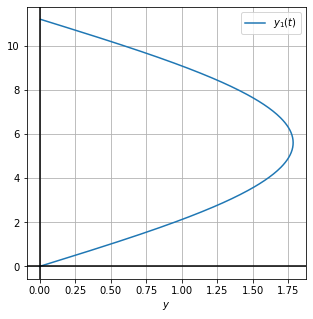

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))
plt.plot(x1, x, label='$y_1(t)$')
plt.xlabel('$y$')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='best')
plt.grid()
plt.show()

In [6]:
yp0 = P

In [7]:
def columna(yp0):
    cond_i = np.array([yp0, 0]) #Condiciones iniciales
    solucion = odeint(func, Y0, x)
    return solucion[0, -1]

columna(-1.02)

0.5

In [8]:
from scipy.optimize import newton
newton(columna, -1.02)

C:\Users\Pc\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:324: RuntimeWarning: Tolerance of -0.00020200000000003548 reached
  warnings.warn(msg, RuntimeWarning)


-1.020101

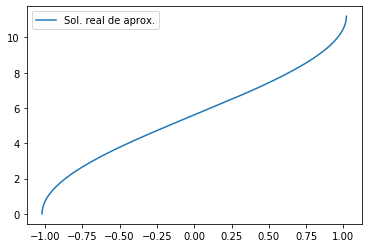

In [9]:
yp0 = -1.020101
y0 = np.array([yp0, 0])
sol = odeint(func, y0, x)
plt.plot( sol[:, 0], x, label='Sol. real de aprox.')
plt.legend()

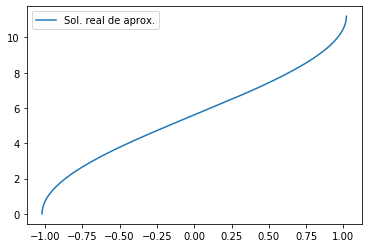

In [10]:
plt.plot( sol[:, 0], x, label='Sol. real de aprox.')
plt.legend();

In [11]:
yp0 = newton(columna, 1)
curv = odeint(func, [0, yp0], x)

C:\Users\Pc\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:324: RuntimeWarning: Tolerance of 0.00019999999999997797 reached
  warnings.warn(msg, RuntimeWarning)


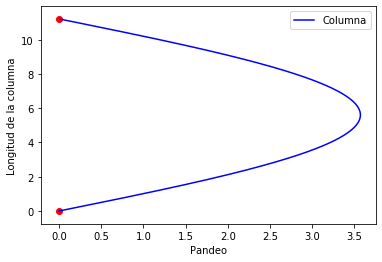

In [12]:
plt.plot(curv[:, 0], x, 'b', label='Columna')
plt.scatter([0, 0], [11.20, 0], color = 'red')
plt.legend(loc = 'best')
plt.xlabel('Pandeo')
plt.ylabel('Longitud de la columna');

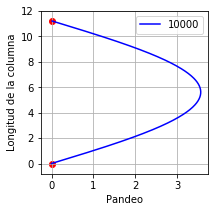

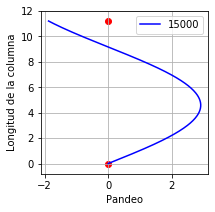

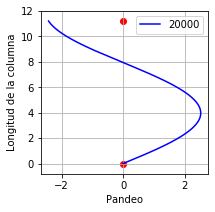

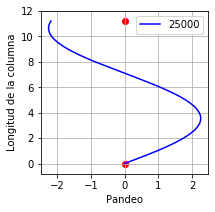

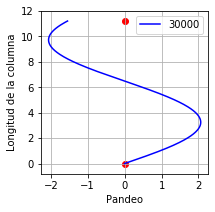

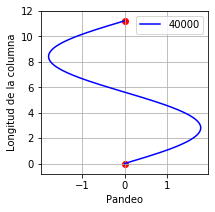

In [47]:
def columna(yp0):
    cond_i = np.array([0, yp0])
    solucion = odeint(func, [0, yp0], x)
    return solucion[0, 0]


for i in [10000, 15000, 20000, 25000, 30000, 40000]:
    P = i
  
    curv = odeint(func, [0 ,yp0], x)    
    plt.figure(figsize=(3,3))
    plt.plot(curv[:, 0], x, 'b', label=i)
    plt.scatter([0, 0], [11.20, 0], color = 'red')
    plt.legend(loc = 'best')
    plt.xlabel('Pandeo')
    plt.ylabel('Longitud de la columna');
    plt.grid()
    plt.show()

## CONCLUSIONES

## REFERENCIAS

ZILL, D. E. N. N. I. S. (2014). Ecuaciones diferenciales con aplicaciones de modelado (7ma ed.). CENGAGE LEARNING EDITORES. Pág. 244
N.A. (n.d.). TEMA 10: PANDEO. Revisado Diciembre 3, 2019, de http://ocw.usal.es/ensenanzas-tecnicas/resistencia-de-materiales-ingeniero-tecnico-en-obras-publicas/contenidos/Tema10-Pandeo.pdf.